In [ ]:
import pandas as pd
import tensorflow
from tensorflow import keras
from keras.models import model_from_json
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:
base = pd.read_csv('wine.csv')

In [ ]:
entradas = base[base.columns[1:]].to_numpy()
saidas = base[base.columns[0]]

valoresSaida = np.empty((178, 1), dtype=int)

for i in range(178):
   valoresSaida[i]= saidas[i]-1

entradasTrain, entradasTest, valoresSaidaTrain, valoresSaidaTest = train_test_split(entradas, valoresSaida, test_size=0.3)

print("Quantidade de Dados de Treino:" ,len(entradasTrain))
print("Quantidade de Dados de Teste:" ,len(entradasTest))

print("Quantidade de Dados de Treino e dos atributos:" ,entradasTrain.shape)
print("Quantidade de Dados de Teste e dos atributos" ,entradasTest.shape)

print("Quantidade de Saidas de Treino e coluna:" ,valoresSaidaTrain.shape)
print("Quantidade de Saidas de Teste e coluna:" ,valoresSaidaTest.shape)

print("min: ", valoresSaidaTrain.min())
print("max: ", valoresSaidaTrain.max())



Quantidade de Dados de Treino: 124
Quantidade de Dados de Teste: 54
Quantidade de Dados de Treino e dos atributos: (124, 13)
Quantidade de Dados de Teste e dos atributos (54, 13)
Quantidade de Saidas de Treino e coluna: (124, 1)
Quantidade de Saidas de Teste e coluna: (54, 1)
min:  0
max:  2


Epoch 1/70
3/3 [==============================] - 1s 104ms/step - loss: 36.4997 - accuracy: 0.2209 - val_loss: 2.7387 - val_accuracy: 0.6316
Epoch 2/70
3/3 [==============================] - 0s 18ms/step - loss: 10.3294 - accuracy: 0.3721 - val_loss: 13.8122 - val_accuracy: 0.4211
Epoch 3/70
3/3 [==============================] - 0s 19ms/step - loss: 7.0358 - accuracy: 0.4302 - val_loss: 1.4586 - val_accuracy: 0.4737
Epoch 4/70
3/3 [==============================] - 0s 14ms/step - loss: 3.5278 - accuracy: 0.2907 - val_loss: 4.0450 - val_accuracy: 0.4474
Epoch 5/70
3/3 [==============================] - 0s 14ms/step - loss: 4.3388 - accuracy: 0.2326 - val_loss: 1.5325 - val_accuracy: 0.4737
Epoch 6/70
3/3 [==============================] - 0s 14ms/step - loss: 1.7658 - accuracy: 0.3372 - val_loss: 3.0882 - val_accuracy: 0.4211
Epoch 7/70
3/3 [==============================] - 0s 13ms/step - loss: 2.5100 - accuracy: 0.3953 - val_loss: 0.8599 - val_accuracy: 0.6053
Epoch 8/70
3/3 [=======

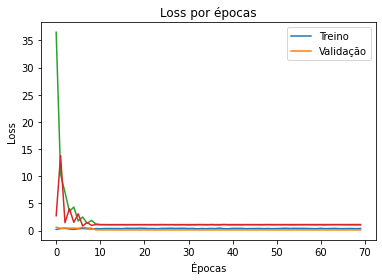

In [ ]:
modelo = keras.Sequential([keras.layers.Dropout(0.2),
                           keras.layers.Dense(130, activation=tensorflow.nn.relu),
                           keras.layers.Dense(70, activation=tensorflow.nn.relu),
                           keras.layers.Dense(40, activation=tensorflow.nn.relu),
                           keras.layers.Dense(13, activation=tensorflow.nn.relu),
                           keras.layers.Dense(3, activation=tensorflow.nn.softmax)
                           ])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

hist=modelo.fit(entradasTrain, valoresSaidaTrain, epochs=70, validation_split=0.3)

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss por épocas')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend(['Treino', 'Validação'])

model_json = modelo.to_json()
with open("model.json", "w") as json_file:
   json_file.write(model_json)

modelo.save_weights("model.h5")
print("Modelo Salvo")

json_file = open("model.json", "r")
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")
print("Modelo Carregado")

loaded_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

perda_teste, acuracia_teste = loaded_model.evaluate(entradasTest, valoresSaidaTest)
print("Perda do teste: ", perda_teste)
print("Acurácia do teste: ", acuracia_teste)
testes=loaded_model.predict(entradasTest)

x=0
for i in testes:
   print(np.argmax(i), valoresSaidaTest[x])
   x=x+1